In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import LowessSmoother
import skfda
from skfda.representation.interpolation import SplineInterpolation
from sklearn.preprocessing import normalize

# Andiamo ad aprire le bande dei campi 4 e 6

In [24]:
with open('./pickles/campo4_bande.pickle', 'rb') as handle:
    campo4 = pickle.load(handle)
with open('./pickles/campo6_bande.pickle', 'rb') as handle:
    campo6 = pickle.load(handle)

print(campo4.shape)
print(campo6.shape)

(57, 12, 43, 74)
(57, 12, 52, 84)


In [25]:
Allpixelndvi4 = (campo4[:,7,:,:]-campo4[:,5,:,:])/(campo4[:,7,:,:]+campo4[:,5,:,:])
Allpixelndvi6 = (campo6[:,7,:,:]-campo6[:,5,:,:])/(campo6[:,7,:,:]+campo6[:,5,:,:])

C:\Users\pc\AppData\Local\Temp\ipykernel_17160\833565723.py:1: RuntimeWarning: invalid value encountered in divide
  Allpixelndvi4 = (campo4[:,7,:,:]-campo4[:,5,:,:])/(campo4[:,7,:,:]+campo4[:,5,:,:])
C:\Users\pc\AppData\Local\Temp\ipykernel_17160\833565723.py:2: RuntimeWarning: invalid value encountered in divide
  Allpixelndvi6 = (campo6[:,7,:,:]-campo6[:,5,:,:])/(campo6[:,7,:,:]+campo6[:,5,:,:])


In [52]:
validePixelNDVI4 = []
#validePixelNDRE = []
for a in range(Allpixelndvi4.shape[1]):
    for b in range(Allpixelndvi4.shape[2]):
        if(not np.isnan(np.sum(Allpixelndvi4[:,a,b]))):
            validePixelNDVI4.append(Allpixelndvi4[:,a,b])

In [53]:
validePixelNDVI6 = []
#validePixelNDRE = []
for a in range(Allpixelndvi6.shape[1]):
    for b in range(Allpixelndvi6.shape[2]):
        if(not np.isnan(np.sum(Allpixelndvi6[:,a,b]))):
            validePixelNDVI6.append(Allpixelndvi6[:,a,b])

In [54]:
print(validePixelNDVI4)
print(validePixelNDVI6)

[array([ 0.01439621, -0.0005913 ,  0.14272322,  0.0265622 ,  0.02089943,
        0.03648176, -0.08106643,  0.01853302, -0.02280325,  0.03933637,
        0.06448311,  0.0456051 ,  0.13228651,  0.15114334,  0.06454721,
        0.02360718,  0.02244737, -0.00901383, -0.01834586, -0.01158301,
        0.00943198,  0.00863436,  0.02733106,  0.02922791,  0.06874459,
       -0.0140198 ,  0.04750553,  0.00974859,  0.08394896,  0.04616354,
        0.07124979,  0.07014582,  0.06218308,  0.06777646,  0.06264657,
       -0.01357712,  0.06382301,  0.07381703,  0.02339048,  0.06170808,
        0.04502914,  0.06595715,  0.02640971,  0.03614029,  0.00230415,
        0.01362604,  0.02910866,  0.06796117,  0.05049657,  0.07375307,
       -0.02012579,  0.05970397,  0.03324219,  0.01481778,  0.01141553,
        0.03712575, -0.01016824]), array([ 0.01617357, -0.00883421,  0.06612203,  0.03832358,  0.01214369,
        0.18477801, -0.11700439,  0.00922266, -0.03228081,  0.15787004,
        0.02162278,  0.16178

248860


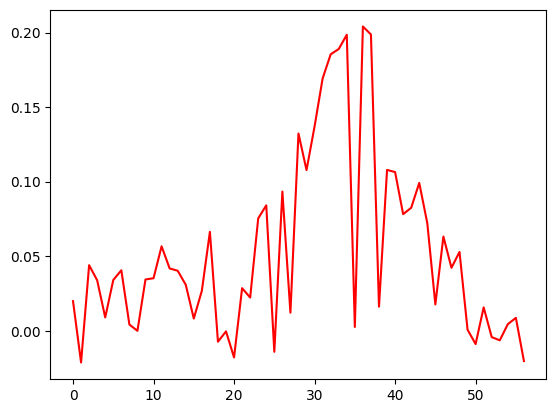

In [30]:
print(np.count_nonzero(Allpixelndvi6))
plt.plot(Allpixelndvi6[:,30,30], color="red")

# Faccio lo smoothing delle serie temporali

In [31]:
imageSmooth = np.zeros([57, 43, 74])

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.01, iterations=1)

for x in range(Allpixelndvi6.shape[1]):
    for y in range(0,Allpixelndvi6.shape[1]):
        imageSmooth[:,x,y] = smoother.smooth(Allpixelndvi6[:,x,y]).smooth_data[0]

plt.imshow(imageSmooth[10])

ValueError: data must not contain NaNs or Inf